# DATA PREPROCESSING

### **Importing necessary python libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Loading the data set**

In [3]:
# Making data frame from insurance.csv data set
insurance_dataframe=pd.read_csv('Data Set\insurance.csv')

In [4]:
#Overview on dataset
insurance_dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
#printing 1st five rows of dataset
insurance_dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#printing last five rows of dataset
insurance_dataframe.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
#printing the shape of dataset
insurance_dataframe.shape

(1338, 7)

In [8]:
#printing the info about dataset
insurance_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
#description about the dataset
insurance_dataframe.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
# To check if any null values exist
insurance_dataframe.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<div> So there are no NAN values in any of the row of the the dataset</div>

### Encoding the categorial values

*Label Encoding* :- Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project. In the given dataset columns like sex,region,smoke are not numerical values. So they needed to be encoded into numeric values with label encoder. Here we use normal "Label encoder" instead of "one hot encoder".

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

# encoding feature "sex" into numeric values
label_encoder.fit(insurance_dataframe.sex.drop_duplicates())
insurance_dataframe.sex=label_encoder.transform(insurance_dataframe.sex)

# encoding feature "smoker" into numeric values
label_encoder.fit(insurance_dataframe.smoker.drop_duplicates())
insurance_dataframe.smoker=label_encoder.transform(insurance_dataframe.smoker)

# encoding feature "region" into numeric values
label_encoder.fit(insurance_dataframe.region.drop_duplicates())
insurance_dataframe.region=label_encoder.transform(insurance_dataframe.region)

In [13]:
#printing the new encoded dataset
insurance_dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


# DATA ANALYSIS

### Correlation

correlation :-Correlation analysis is a statistical technique for determining the strength of a link between two variables. It is used to detect patterns and trends in data and to forecast future occurrences.


  <blockquote>
  <ol>

  <li>
  
  Positive Correlation: Positive correlation indicates that two variables have a direct relationship. As one variable increases, the other variable also increases. For example, there is a positive correlation between height and weight. As people get taller, they also tend to weigh more.

  </li>


  <li>
  
  Negative Correlation: Negative correlation indicates that two variables have an inverse relationship. As one variable increases, the other variable decreases. For example, there is a negative correlation between price and demand. As the price of a product increases, the demand for that product decreases.

  </li>

  
  <li>
  
  Zero Correlation: Zero correlation indicates that there is no relationship between two variables. The changes in one variable do not affect the other variable. For example, there is zero correlation between shoe size and intelligence.
  
  </li>
  </ol>
  
  </blockquote>

In [14]:
#printing correlation of all features of the dataset
insurance_dataframe.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [15]:
# we need correlation with "charges" feature 
insurance_dataframe.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<Axes: >

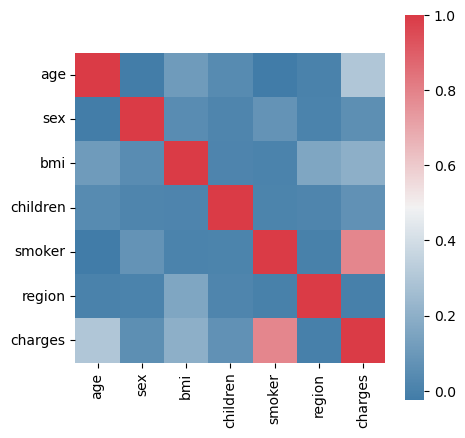

In [21]:
# printing the heat map which shows the total correlation in a graphical form
f,ax=plt.subplots(figsize=(5,5))
correlation=insurance_dataframe.corr()
sns.heatmap(correlation,mask=np.zeros_like(correlation),cmap=sns.diverging_palette(240,10,as_cmap=True),square=True,ax=ax)

Here based upon heatmap we can say there is a very high corelation between "charges"(target variable) and feature "smoker". Also features like age,bmi,children,sex shown positive correlation with "charges" in decreasing order.